### Evaluate agreement bias for the boolean task

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
model_name_mapping = {
    'LLM-GPT3.5': 'ChatGPT-3.5',
    'LLM-GPT4': 'ChatGPT-4',
    'LLM-GeminiPro': 'Gemini-Pro',
    'LLM-LLAMA3(70b)': 'LLAMA3-70B', 
    'LLM-LLAMA3(7b)': 'LLAMA3-8B',
    'LLM-Mistral(7b)': 'Mistral-7B',
    'LLM-Mixtral': 'Mixtral-8x7B'
    
}

In [3]:
sns.set_theme(style="darkgrid", font_scale=1.2)

In [4]:
def count_first_alpha_tf(column):
    """Counts 'T' and 'F' occurrences based on the 
       first alphabetical character in each cell (case-insensitive).
    """
    true_counts = 0
    false_counts = 0

    for cell in df[column]:
        if isinstance(cell, str):
            for char in cell:
                if char.isalpha():  # Check if the character is alphabetical
                    first_alpha = char.upper()
                    if first_alpha == 'T':
                        true_counts += 1
                    elif first_alpha == 'F':
                        false_counts += 1
                    break  # Stop after finding the first alphabetical character
        
    return true_counts, false_counts

In [5]:
# plt.rcParams.update({'font.size': 20})  # Set default font size to 12
# plt.rcParams.update({'font.weight': 'bold'})

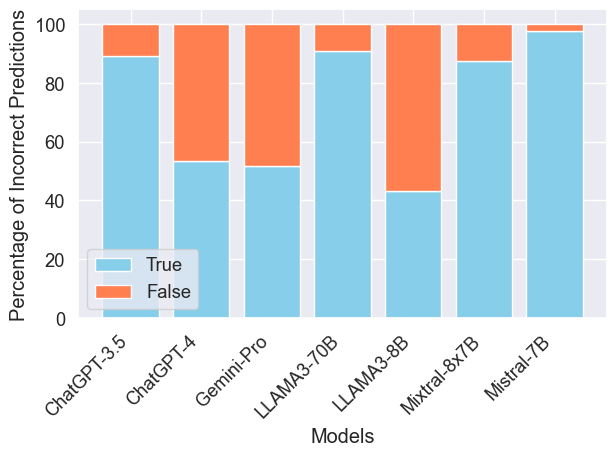

In [6]:

# Load the CSV file into a pandas DataFrame
# df = pd.read_csv("All Models_ Q&A - task-cve-context.tsv", sep='\t', encoding='utf-8')  # Replace "your_file.csv" with the actual file name

excel_file = 'All Models_ Q&A.xlsx'
# Replace 'Sheet1' with the actual sheet name you want to read
sheet_name = 'task-cve-no-context'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)


true_percentages = {}
false_percentages = {}

# Iterate through columns that start with "LLM-" and don't contain "Flash"
for column in df.columns:
# for column in model_name_mapping:
    if column in model_name_mapping:
        true_counts, false_counts = count_first_alpha_tf(column)

        # Calculate total count for this column
        total_counts = true_counts + false_counts 

        # Calculate percentages only if total_counts is not zero (to avoid division by zero)
        if total_counts > 0:
            true_percentages[column] = (true_counts / total_counts) * 100
            false_percentages[column] = (false_counts / total_counts) * 100
        else:
            true_percentages[column] = 0
            false_percentages[column] = 0

# Plotting
fig, ax = plt.subplots()

models = list(true_percentages.keys())  # Get the valid "LLM-" column names
bar_width = 0.8
index = range(len(models))

# Bars for "True" predictions (using percentages)
ax.bar(index, true_percentages.values(), bar_width, label='True', color='skyblue')

# Bars for "False" predictions (stacked, using percentages)
ax.bar(index, false_percentages.values(), bar_width, bottom=true_percentages.values(), label='False', color='coral')

# Chart labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage of Incorrect Predictions') 
# ax.set_title('OOD Detection Failure Distribution (Percentage)')
ax.set_xticks(index)
ax.set_xticklabels([model_name_mapping[x] for x in models], rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('bias-no-context.png', dpi=300)
plt.show()

In [7]:
def count_prediction_errors(prediction_column, gt_column):
    """Counts True Positive (TP), True Negative (TN), 
       False Positive (FP), and False Negative (FN) errors 
       by comparing predictions to ground truth values.
    """
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0

    for prediction_cell, gt_cell in zip(df[prediction_column], df[gt_column]):
        if isinstance(prediction_cell, str) and isinstance(gt_cell, str):
            # Find first alphabetical characters (case-insensitive)
            pred_alpha = next((char.upper() for char in prediction_cell if char.isalpha()), None)
            gt_alpha = next((char.upper() for char in gt_cell if char.isalpha()), None)

            # Compare and update counts
            if gt_alpha == 'T': 
                if pred_alpha == 'T':
                    tp_count += 1
                elif pred_alpha == 'F':
                    fn_count += 1
            elif gt_alpha == 'F':
                if pred_alpha == 'F':
                    tn_count += 1
                elif pred_alpha == 'T':
                    fp_count += 1

    return fp_count, fn_count

In [8]:
# plt.rcParams.update({'font.size': 12})  # Set default font size to 12

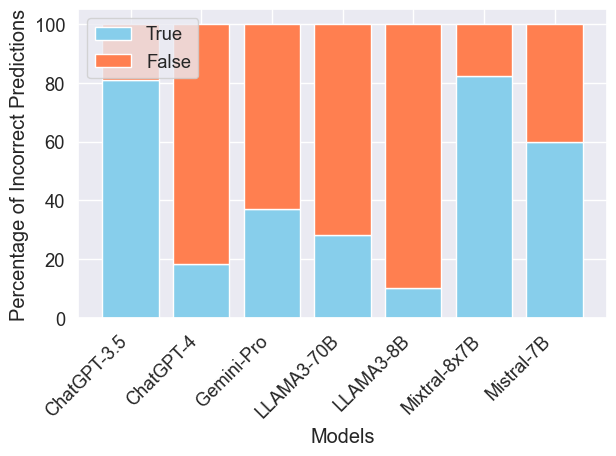

In [9]:
excel_file = 'All Models_ Q&A.xlsx'
# Replace 'Sheet1' with the actual sheet name you want to read
sheet_name = 'task-cve-context'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)


true_percentages = {}
false_percentages = {}

# Iterate through columns that start with "LLM-" and don't contain "Flash"
ground_truth_col = 'Correct Answer'
for column in df.columns:
# for column in model_name_mapping:
    if column in model_name_mapping:
        true_counts, false_counts = count_prediction_errors(column, ground_truth_col)

        # Calculate total count for this column
        total_counts = true_counts + false_counts 

        # Calculate percentages only if total_counts is not zero (to avoid division by zero)
        if total_counts > 0:
            true_percentages[column] = (true_counts / total_counts) * 100
            false_percentages[column] = (false_counts / total_counts) * 100
        else:
            true_percentages[column] = 0
            false_percentages[column] = 0

# Plotting
fig, ax = plt.subplots()

models = list(true_percentages.keys())  # Get the valid "LLM-" column names
bar_width = 0.8
index = range(len(models))

# Bars for "True" predictions (using percentages)
ax.bar(index, true_percentages.values(), bar_width, label='True', color='skyblue')

# Bars for "False" predictions (stacked, using percentages)
ax.bar(index, false_percentages.values(), bar_width, bottom=true_percentages.values(), label='False', color='coral')

# Chart labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Percentage of Incorrect Predictions') 
# ax.set_title('OOD Detection Failure Distribution (Percentage)')
ax.set_xticks(index)
ax.set_xticklabels([model_name_mapping[x] for x in models], rotation=45, ha='right')
plt.legend()

# Display the plot
plt.tight_layout()
plt.savefig('bias-context.png', dpi=300)
plt.show()

#### How to compute CVSS

In [10]:
from cvss import CVSS2, CVSS3, CVSS4


vector = 'CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:L/A:L'
c = CVSS3(vector)
print(vector)
print(c.clean_vector())
print(c.scores())


CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:L/A:L
CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:L/I:L/A:L
(6.3, 6.3, 6.3)


### Plot Spearman Correleation

In [11]:
88.62,82.84,86.19,86.29,82.09,77.99,80.88
89.64,84.15,87.77,90.36,83.94,80.1,83.73
87.55,78.33,83.48,85.19,82.83,64.16,79.61
0.53,0.48,0.54,0.51,0.48,0.42,0.39
0.81,1.26,1,1.54,1.77,1.82,1.63


(0.81, 1.26, 1, 1.54, 1.77, 1.82, 1.63)

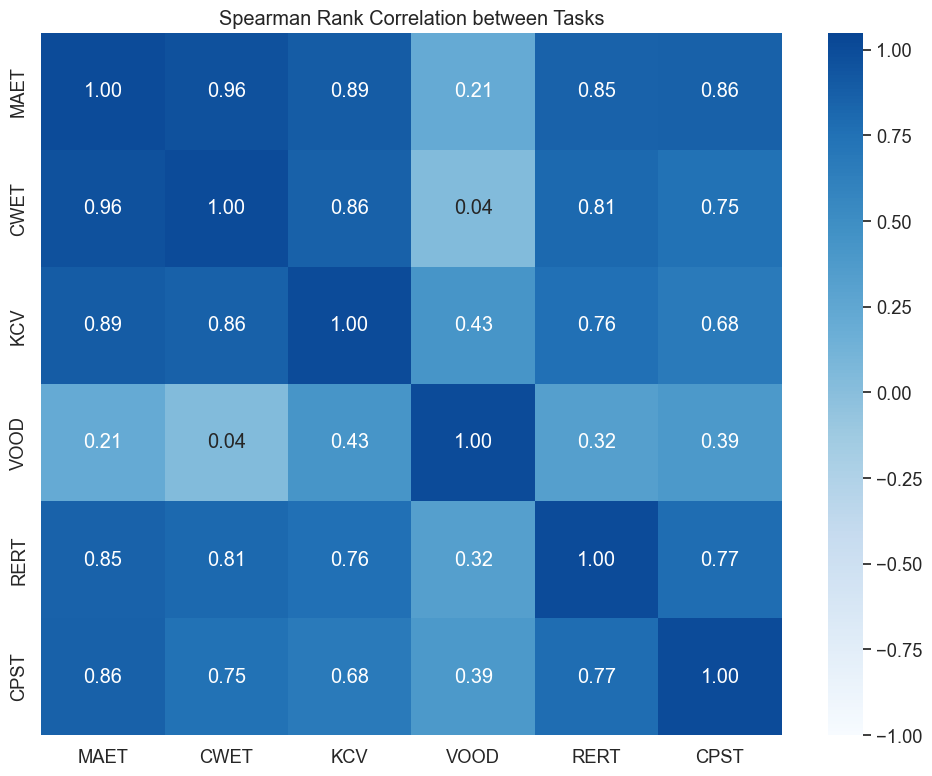

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Example DataFrame with performance scores



data = {
    'MAET': [88.62,82.84,86.19,86.29,82.09,77.99,80.88],
    'CWET': [89.64,84.15,87.77,90.36,83.94,80.1,83.73],
    'KCV': [87.55,78.33,83.48,85.19,82.83,64.16,79.61],
    'VOOD': [87.98,8.4,86.7,27.04,56.44,57.1,69.31],
    'RERT': [0.53,0.48,0.54,0.51,0.48,0.42,0.39],
    'CPST': [0.81,1.26,1,1.54,1.77,1.82,1.63]
}
df = pd.DataFrame(data)

# Invert scores for Task6
df['CPST'] = df['CPST'].max() - df['CPST']

# Normalize the scores to [0, 1]
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Rank the normalized scores
ranked_df = normalized_df.rank()

# Compute the Spearman's rank correlation matrix
spearman_corr = ranked_df.corr(method='spearman')

# Create a custom blueish colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#f7fbff", "#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#084594"]
n_bins = 200  # Discretizes the interpolation into bins
cmap_name = 'custom_blue'
custom_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap=custom_cmap, vmin=-1, vmax=1.05, fmt=".2f")
plt.title('Spearman Rank Correlation between Tasks')
plt.tight_layout()
plt.savefig('spearman.png', dpi=300)

plt.show()

### Open vs Closed Models

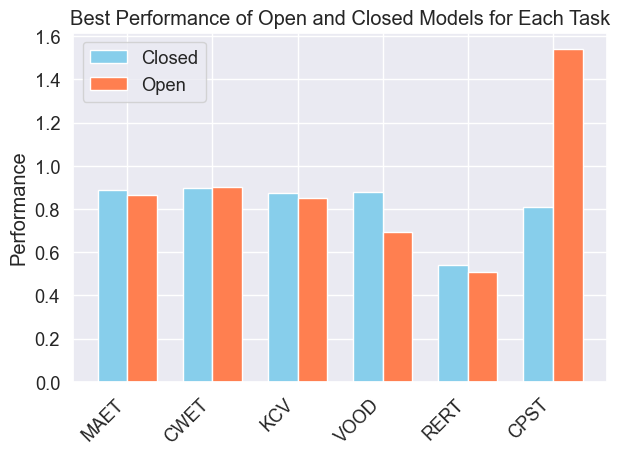

In [13]:
# import matplotlib.pyplot as plt
import numpy as np

# Data 
data = {
    'MAET': [88.62,82.84,86.19,86.29,82.09,77.99,80.88],
    'CWET': [89.64,84.15,87.77,90.36,83.94,80.1,83.73],
    'KCV': [87.55,78.33,83.48,85.19,82.83,64.16,79.61],
    'VOOD': [87.98,8.4,86.7,27.04,56.44,57.1,69.31],
    'RERT': [0.53,0.48,0.54,0.51,0.48,0.42,0.39],
    'CPST': [0.81,1.26,1,1.54,1.77,1.82,1.63]
}

tasks = list(data.keys())
closed_models = ['GPT4', 'GPT3', 'Gemini-Pro']
open_models = ['LLAMA3-70B', 'LLAMA3-8B', 'Mistral-7B', 'Mixtral']

# Scale accuracy values for the first four tasks
scaled_data = {}
for task in tasks:
    if task in ['MAET', 'CWET', 'KCV', 'VOOD']:
        scaled_data[task] = [val / 100 for val in data[task]]
    else:
        scaled_data[task] = data[task]

# Extract best performance for open and closed models
open_best = []
closed_best = []

for task in tasks:
    if task == 'CPST':
        closed_best.append(min(scaled_data[task][:3]))  # Lower is better
        open_best.append(min(scaled_data[task][3:]))  # Lower is better
    else:
        closed_best.append(max(scaled_data[task][:3]))  # Higher is better
        open_best.append(max(scaled_data[task][3:]))  # Higher is better

x = np.arange(len(tasks))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/2, closed_best, width, label='Closed', color='skyblue')

rects1 = ax.bar(x + width/2, open_best, width, label='Open', color='coral')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Performance')
ax.set_title('Best Performance of Open and Closed Models for Each Task')
ax.set_xticks(x)
ax.set_xticklabels(tasks, rotation=45, ha="right")
ax.legend()

fig.tight_layout()
plt.savefig('open-closed.png', dpi=300)

plt.show()

### Evaluating Novice/Expert Acc

In [14]:
# import pandas as pd

# Load the Excel file
excel_file = 'All Models_ Q&A.xlsx'
sheets_to_analyze = ['task-mcq-mitre', 'task-cve-context']
df = pd.read_excel(excel_file, sheet_name=sheets_to_analyze)

def get_first_alpha(cell):
    """Returns the uppercase first alphabetical character of a cell, 
       or None if not found.
    """
    if pd.notna(cell) and isinstance(cell, str):
        for char in cell:
            if char.isalpha():
                return char.upper()
    return None  # Return None if no alphabetical character is found

def calculate_accuracy(df, task_name):
    """Calculates and prints accuracy for each LLM, 
       grouped by 'Level' (Novice/Expert) for a specific task,
       and also calculates overall accuracy per model.
    """
    print(f"----- Task: {task_name} -----\n")

    model_true_counts = {}  # Store true counts for each model
    model_false_counts = {} # Store false counts for each model

    for level in df['Level'].unique():
        level_df = df[df['Level'] == level]
        print(f"Level: {level}")

        gt_column = 'Correct Answer'  # Set the ground truth column name

        for column in level_df.columns:
            if column in model_name_mapping:
                if column not in model_true_counts:
                    model_true_counts[column] = 0
                    model_false_counts[column] = 0

                for i in range(len(level_df)):
                    # Get the ground truth for this row
                    gt_first_alpha = get_first_alpha(level_df[gt_column].iloc[i])
                    
                    # Get the first alpha from the LLM output for this row
                    llm_first_alpha = get_first_alpha(level_df[column].iloc[i])

                    # Compare and update counts
                    if gt_first_alpha is not None and llm_first_alpha is not None:
                        if gt_first_alpha == llm_first_alpha:
                            model_true_counts[column] += 1
                        else:
                            model_false_counts[column] += 1

                # Calculate accuracy for the current level and model
                true_count = model_true_counts[column]
                false_count = model_false_counts[column]
                accuracy = true_count / (true_count + false_count) if (true_count + false_count) > 0 else 0
                print(f"  LLM: {column}, Accuracy: {accuracy:.2f}")

        print("\n")

    # Calculate and print overall accuracy per model
    print("Overall Model Accuracies:")
    for model in model_true_counts:
        overall_accuracy = model_true_counts[model] / (model_true_counts[model] + model_false_counts[model]) if (model_true_counts[model] + model_false_counts[model]) > 0 else 0
        print(f"  {model}: {overall_accuracy:.2f}")
    print("\n")

# Analyze each task sheet
for task_name in sheets_to_analyze:
    calculate_accuracy(df[task_name], task_name)

----- Task: task-mcq-mitre -----

Level: Novice
  LLM: LLM-GPT3.5, Accuracy: 0.83
  LLM: LLM-GPT4, Accuracy: 0.86
  LLM: LLM-GeminiPro, Accuracy: 0.85
  LLM: LLM-LLAMA3(70b), Accuracy: 0.86
  LLM: LLM-Mixtral, Accuracy: 0.80
  LLM: LLM-LLAMA3(7b), Accuracy: 0.80
  LLM: LLM-Mistral(7b), Accuracy: 0.76


Level: Expert
  LLM: LLM-GPT3.5, Accuracy: 0.83
  LLM: LLM-GPT4, Accuracy: 0.89
  LLM: LLM-GeminiPro, Accuracy: 0.86
  LLM: LLM-LLAMA3(70b), Accuracy: 0.86
  LLM: LLM-Mixtral, Accuracy: 0.81
  LLM: LLM-LLAMA3(7b), Accuracy: 0.82
  LLM: LLM-Mistral(7b), Accuracy: 0.78


Overall Model Accuracies:
  LLM-GPT3.5: 0.83
  LLM-GPT4: 0.89
  LLM-GeminiPro: 0.86
  LLM-LLAMA3(70b): 0.86
  LLM-Mixtral: 0.81
  LLM-LLAMA3(7b): 0.82
  LLM-Mistral(7b): 0.78


----- Task: task-cve-context -----

Level: Novice
  LLM: LLM-GPT3.5, Accuracy: 0.86
  LLM: LLM-GPT4, Accuracy: 0.90
  LLM: LLM-GeminiPro, Accuracy: 0.86
  LLM: LLM-LLAMA3(70b), Accuracy: 0.88
  LLM: LLM-LLAMA3(7b), Accuracy: 0.86
  LLM: LLM-Mixtral,

In [15]:
task_name_map = {
    'task-mcq-mitre': 'MAET', 
    'task-cve-context': 'KCV'
}

0.7124095416778343 0.7354890007951232
Difference between Expert and Novice for task-mcq-mitre: 2.31
0.7148936170212766 0.660482374768089
Difference between Expert and Novice for task-cve-context: -5.44


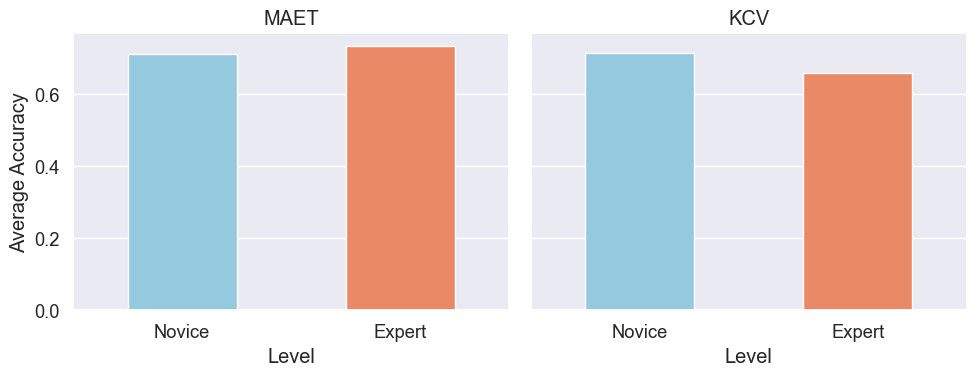

In [16]:
def calculate_avg_accuracy(df, task_name):
    """Calculates average LLM accuracy for each task and level."""
    avg_accuracies = []
    for level in df['Level'].unique():
        level_df = df[df['Level'] == level]
        total_correct = 0
        total_attempts = 0
        for column in model_name_mapping:
            total_correct += level_df[level_df[column] == level_df['Correct Answer']].shape[0]
            total_attempts += len(level_df)
        avg_accuracy = total_correct / total_attempts if total_attempts > 0 else 0
        avg_accuracies.append({'Task': task_name, 'Level': level, 'Average Accuracy': avg_accuracy})
    return avg_accuracies

# Calculate average accuracies
all_accuracies = []
for task_name in sheets_to_analyze:
    all_accuracies.extend(calculate_avg_accuracy(df[task_name], task_name))

avg_accuracy_df = pd.DataFrame(all_accuracies)


# --- Calculate and Print Differences ---
for task in avg_accuracy_df['Task'].unique():
    task_data = avg_accuracy_df[avg_accuracy_df['Task'] == task]
    novice_accuracy = task_data[task_data['Level'] == 'Novice']['Average Accuracy'].values[0]
    expert_accuracy = task_data[task_data['Level'] == 'Expert']['Average Accuracy'].values[0]
    print(novice_accuracy, expert_accuracy)
    difference = 100 * (expert_accuracy - novice_accuracy)
    print(f"Difference between Expert and Novice for {task}: {difference:.2f}")


fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True) 

# Define colors for the levels
level_colors = {
    'Novice': 'skyblue', 
    'Expert': 'coral'
}

for i, task in enumerate(avg_accuracy_df['Task'].unique()):
    task_data = avg_accuracy_df[avg_accuracy_df['Task'] == task]
    
    # Use 'hue' instead of 'x' and set 'legend=False'
    sns.barplot(x='Level', y='Average Accuracy', hue='Level', data=task_data, 
                ax=axes[i], palette=level_colors, legend=False, width=0.5) 
    
    axes[i].set_title(f'{task_name_map[task]}')

plt.tight_layout()
plt.show()

## Confidencs vs Accuracy

In [17]:
def calculate_accuracy_by_confidence(df, response_col, confidence_col, num_bins=10):
    """Calculates accuracy for dynamically created bins of confidence scores."""
    df['Confidence'] = df[confidence_col].apply(lambda x: float(x[1:-1].split(',')[1]) if isinstance(x, str) else None)
    df['IsCorrect'] = False  # Initialize the 'IsCorrect' column

    for index, row in df.iterrows():
        try:
            # Remove leading/trailing whitespace 
            response_str = row[response_col].strip()
            response_letter = response_str[2]  

            if isinstance(response_letter, str) and response_letter != '':
                df.loc[index, 'IsCorrect'] = response_letter == row['Correct Answer'][0]
            else:
                print(f"  Warning: Invalid response format in row {index + 2}")
        except (TypeError, IndexError) as e:
            print(f"  Error in row {index + 2}: {e}")

    # Dynamically create bins
    min_conf = df['Confidence'].min()
    max_conf = df['Confidence'].max()
    bins = np.linspace(min_conf, max_conf, num_bins + 1)

    df['Confidence Bin'] = pd.cut(df['Confidence'], bins=bins, right=False)
    accuracy_by_confidence = df.groupby('Confidence Bin')['IsCorrect'].mean() * 100
    return accuracy_by_confidence, bins

In [18]:
# --- Load Excel File ---
# Replace 'your_excel_file.xlsx' with the actual file name
# Load the Excel file
excel_file = 'All Models_ Q&A.xlsx'
sheets_to_analyze =  'task-mcq-cwe'

df = pd.read_excel(excel_file, sheet_name=sheets_to_analyze)


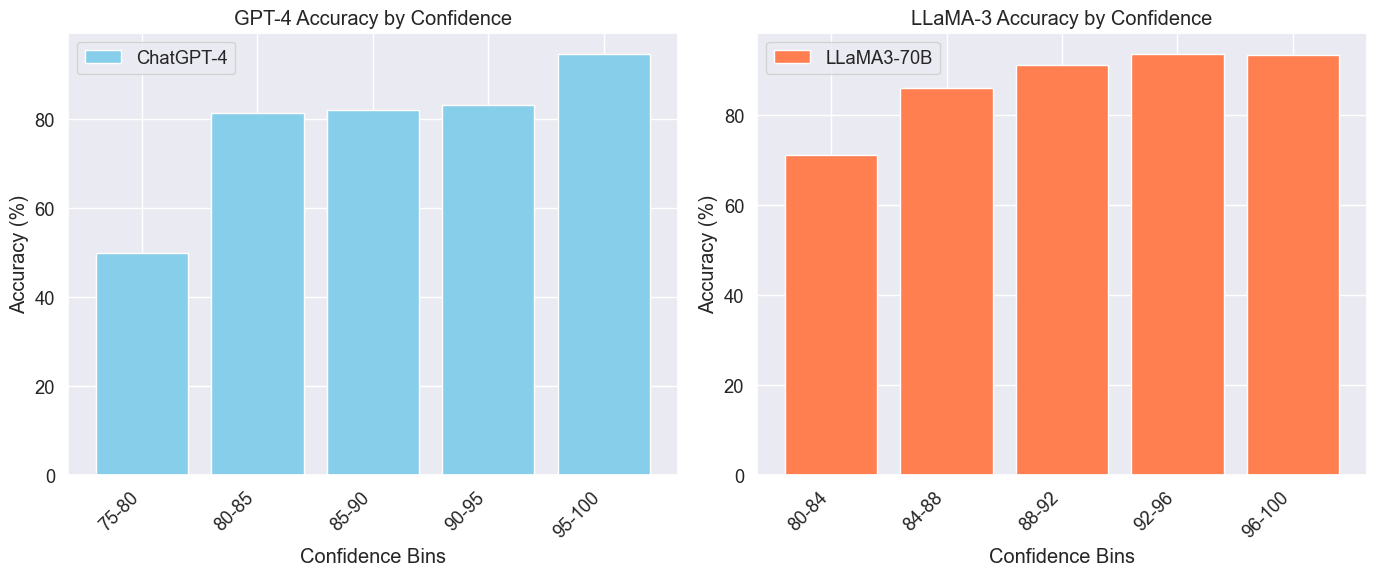

In [35]:
def calculate_accuracy_by_confidence(df, response_col, confidence_col, num_bins=10):
    """Calculates accuracy for dynamically created bins of confidence scores."""
    df['Confidence'] = df[confidence_col].apply(lambda x: float(x[1:-1].split(',')[1]) if isinstance(x, str) else None)
    df['IsCorrect'] = False  # Initialize the 'IsCorrect' column

    for index, row in df.iterrows():
        try:
            # Remove leading/trailing whitespace 
            response_str = row[response_col].strip()
            response_letter = response_str[2]  

            if isinstance(response_letter, str) and response_letter != '':
                df.loc[index, 'IsCorrect'] = response_letter == row['Correct Answer'][0]
            else:
                print(f"  Warning: Invalid response format in row {index + 2}")
        except (TypeError, IndexError) as e:
            print(f"  Error in row {index + 2}: {e}")

    # Dynamically create bins
    min_conf = df['Confidence'].min()
    max_conf = df['Confidence'].max()
    bins = np.linspace(min_conf, max_conf, num_bins + 1)

    df['Confidence Bin'] = pd.cut(df['Confidence'], bins=bins, right=False, labels=False)  # Use labels=False
    accuracy_by_confidence = df.groupby('Confidence Bin')['IsCorrect'].mean() * 100
    return accuracy_by_confidence, bins

# --- Load Excel File ---
# Replace 'your_excel_file.xlsx' with the actual file name
# Load the Excel file
excel_file = 'All Models_ Q&A.xlsx'
sheets_to_analyze =  'task-mcq-cwe'

df = pd.read_excel(excel_file, sheet_name=sheets_to_analyze)


gpt4_accuracy, gpt4_bins = calculate_accuracy_by_confidence(df.copy(), 'Conf-GPT4', 'Conf-GPT4', num_bins=5)
llama3_accuracy, llama3_bins = calculate_accuracy_by_confidence(df.copy(), 'Conf-LLAMA3', 'Conf-LLAMA3', num_bins=5)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns for subplots

# --- GPT-4 ---
axs[0].bar(range(len(gpt4_accuracy)), gpt4_accuracy, color='skyblue', label='ChatGPT-4')
axs[0].set_xticks(range(len(gpt4_bins) - 1))
axs[0].set_xticklabels([f'{int(bin)}-{int(gpt4_bins[i+1])}' for i, bin in enumerate(gpt4_bins[:-1])], rotation=45, ha='right')
axs[0].set_xlabel('Confidence Bins')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('GPT-4 Accuracy by Confidence')
axs[0].legend()

# --- LLaMA-3 ---
axs[1].bar(range(len(llama3_accuracy)), llama3_accuracy, color='coral', label='LLaMA3-70B')
axs[1].set_xticks(range(len(llama3_bins) - 1))
axs[1].set_xticklabels([f'{int(bin)}-{int(llama3_bins[i+1])}' for i, bin in enumerate(llama3_bins[:-1])], rotation=45, ha='right')
axs[1].set_xlabel('Confidence Bins')
axs[1].set_ylabel('Accuracy (%)')
axs[1].set_title('LLaMA-3 Accuracy by Confidence')
axs[1].legend()

plt.tight_layout()
plt.savefig('confidence.png', dpi=300)

plt.show()

### Reasoning

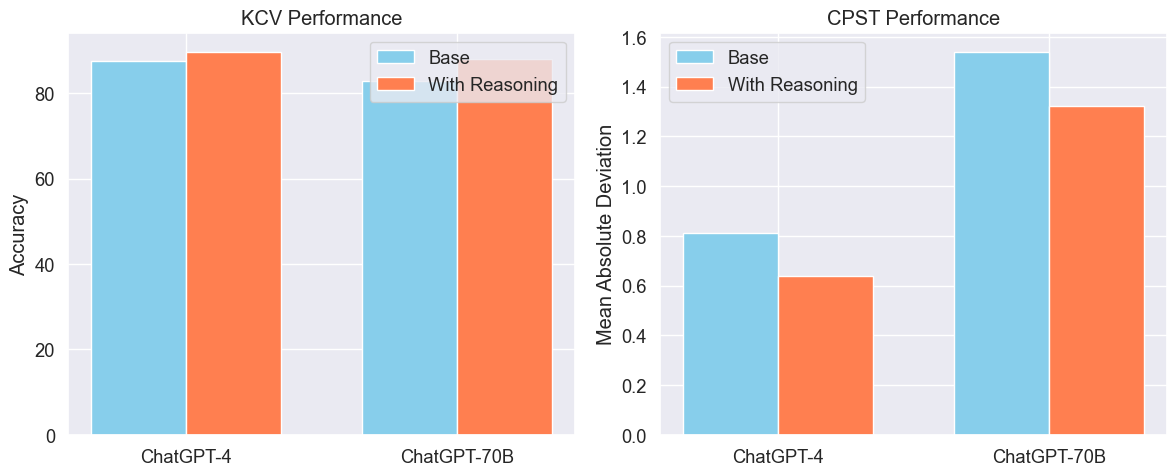

CPST:
Relative change for ChatGPT-4 with Reasoning: -20.99%
Relative change for LLAMA3-70B with Reasoning: -14.29%

KCV:
Relative change for ChatGPT-4 with Reasoning: 2.46%
Relative change for LLAMA3-70B with Reasoning: 6.22%


In [20]:

# Data 
data = {
   'KCV': [87.55, 89.70, 82.83, 87.98],
    'CPST': [0.81, 0.64, 1.54, 1.32]
}

model_names = ['ChatGPT-4', 'ChatGPT-4(R)', 'LLAMA3-70B', 'LLAMA3-70B(R)']

# --- Data Preparation ---
kcv_data = data['KCV']
cpst_data = data['CPST']

base_kcv = [kcv_data[i] for i in range(len(model_names)) if '(R)' not in model_names[i]]
reasoning_kcv = [kcv_data[i] for i in range(len(model_names)) if '(R)' in model_names[i]]
base_cpst = [cpst_data[i] for i in range(len(model_names)) if '(R)' not in model_names[i]]
reasoning_cpst = [cpst_data[i] for i in range(len(model_names)) if '(R)' in model_names[i]]

relative_changes_cpst = [(reasoning - base) / base * 100 for base, reasoning in zip(base_cpst, reasoning_cpst)]
relative_changes_kcv = [(reasoning - base) / base * 100 for base, reasoning in zip(base_kcv, reasoning_kcv)]

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bar_width = 0.35
index = [0, 1]

# --- KCV Subplot ---
ax1.bar(index, base_kcv, bar_width, label='Base', color='skyblue')
ax1.bar([i + bar_width for i in index], reasoning_kcv, bar_width, label='With Reasoning', color='coral')

ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(['ChatGPT-4', 'ChatGPT-70B'])
ax1.set_ylabel('Accuracy')
ax1.set_title('KCV Performance')
ax1.legend()

# --- CPST Subplot ---
ax2.bar(index, base_cpst, bar_width, label='Base', color='skyblue')  # Same color as KCV
ax2.bar([i + bar_width for i in index], reasoning_cpst, bar_width, label='With Reasoning', color='coral')  # Same color as KCV

ax2.set_xticks([i + bar_width/2 for i in index])
ax2.set_xticklabels(['ChatGPT-4', 'ChatGPT-70B'])
ax2.set_ylabel('Mean Absolute Deviation')
ax2.set_title('CPST Performance')
ax2.legend()

plt.tight_layout()
plt.savefig('reasoning.png', dpi=300)
plt.show()

# --- Print relative changes ---
print("CPST:")
for model, change in zip(['ChatGPT-4', 'LLAMA3-70B'], relative_changes_cpst):
    print(f"Relative change for {model} with Reasoning: {change:.2f}%")

print("\nKCV:")
for model, change in zip(['ChatGPT-4', 'LLAMA3-70B'], relative_changes_kcv):
    print(f"Relative change for {model} with Reasoning: {change:.2f}%")

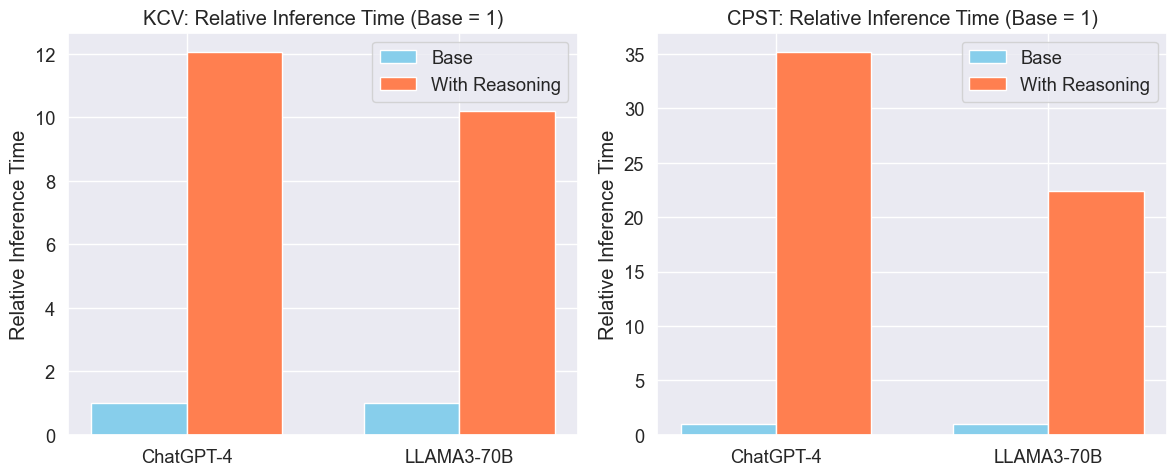

In [21]:
# import matplotlib.pyplot as plt

# Data (Time taken in seconds)
data = {
   'KCV': [0.924660511, 11.15697243, 1.021073837, 10.40903144],
    'CPST': [0.65324471, 23.00740081, 0.808801055, 18.13104455]
}

model_names = ['ChatGPT-4', 'ChatGPT-4(R)', 'ChatGPT-70B', 'ChatGPT-70B(R)']

# --- Data Preparation ---
kcv_data = data['KCV']
cpst_data = data['CPST']

base_kcv = [kcv_data[i] for i in range(len(model_names)) if '(R)' not in model_names[i]]
reasoning_kcv = [kcv_data[i] for i in range(len(model_names)) if '(R)' in model_names[i]]
base_cpst = [cpst_data[i] for i in range(len(model_names)) if '(R)' not in model_names[i]]
reasoning_cpst = [cpst_data[i] for i in range(len(model_names)) if '(R)' in model_names[i]]

# Calculate relative increase in time
relative_increase_cpst = [(reasoning / base) for base, reasoning in zip(base_cpst, reasoning_cpst)]
relative_increase_kcv = [(reasoning / base) for base, reasoning in zip(base_kcv, reasoning_kcv)]

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

bar_width = 0.35
index = [0, 1]

# --- KCV Subplot ---
ax1.bar(index, [1, 1], bar_width, label='Base', color='skyblue')  # Base time is represented as 1 (100%)
ax1.bar([i + bar_width for i in index], relative_increase_kcv, bar_width, label='With Reasoning', color='coral')

ax1.set_xticks([i + bar_width/2 for i in index])
ax1.set_xticklabels(['ChatGPT-4', 'LLAMA3-70B'])
ax1.set_ylabel('Relative Inference Time')
ax1.set_title('KCV: Relative Inference Time (Base = 1)')
ax1.legend()

# --- CPST Subplot ---
ax2.bar(index, [1, 1], bar_width, label='Base', color='skyblue')  # Base time is represented as 1 (100%)
ax2.bar([i + bar_width for i in index], relative_increase_cpst, bar_width, label='With Reasoning', color='coral')

ax2.set_xticks([i + bar_width/2 for i in index])
ax2.set_xticklabels(['ChatGPT-4', 'LLAMA3-70B'])
ax2.set_ylabel('Relative Inference Time')
ax2.set_title('CPST: Relative Inference Time (Base = 1)')
ax2.legend()

plt.tight_layout()
plt.savefig('reasoning-timing.png', dpi=300)
plt.show()

### Response variability plot 

In [22]:
var_gpt4 = [0.7600000000000003, 0.538887743412299, 0.0, 0.0, 0.23999999999999994, 0.3687817782917155, 0.0, 0.2799999999999997, 0.04898979485566339, 0.5878775382679629, 0.0, 0.8, 1.0461357464497614, 0.8593020423576334, 0.0, 0.7348469228349539, 0.0, 0.4399999999999999, 0.0, 0.2800000000000004, 0.0, 0.0, 0.12000000000000029, 0.0, 0.5878775382679624, 0.0, 0.3919183588453084, 0.0, 0.19999999999999998, 0.0, 1.0, 0.0, 0.6974238309665077, 1.2393546707863734, 0.0, 0.0, 0.31999999999999995, 0.39999999999999997, 0.2449489742783178, 0.04898979485566383, 0.8708616422830895, 0.0, 0.08000000000000007, 0.5878775382679629, 0.31874754901018465, 0.8799999999999999, 0.9599999999999997, 0.23999999999999985, 0.19999999999999998, 0.7348469228349533, 0.39999999999999997, 0.3611094017053562, 0.8800000000000001, 0.0, 0.37947331922020555, 0.0, 0.44899888641287294, 0.39999999999999997, 0.38470768123342686, 0.04000000000000021, 0.5388877434122991, 0.0, 0.22449944320643667, 0.08000000000000042, 0.8800000000000001, 0.0, 1.0, 0.0, 0.1469693845669906, 0.8024961059095553, 0.0, 0.04898979485566339, 0.0, 0.6799999999999996, 0.0, 0.5642694391866351, 0.2870540018881467, 0.0, 1.1267652816802618, 0.14696938456699105, 0.1199999999999996, 0.19999999999999998, 0.6, 0.11999999999999993, 0.24494897427831783, 0.3200000000000003, 0.34292856398964455, 0.0, 0.64, 0.39999999999999997, 0.0, 0.1469693845669906, 0.4664761515876241, 0.3199999999999999, 0.19595917942265423, 0.48989794855663565, 0.783836717690617, 0.0, 0.0, 0.0]

In [23]:
vargpt3 = [0.8014985963805553, 0.7445804187594512, 0.18330302779823357, 0.2993325909419156, 0.2939387691339816, 1.0150862032359615, 0.6529931086925801, 0.6799999999999999, 0.11999999999999957, 0.5865151319446071, 0.48989794855663565, 0.15491933384829681, 0.11999999999999993, 0.8309031231136395, 0.6228964600958973, 0.5946427498927401, 0.6280127387243036, 1.0011992808627062, 0.872696969170857, 0.18547236990991406, 0.19390719429665315, 0.17435595774162702, 0.29933259094191556, 0.17435595774162632, 0.3919183588453085, 1.0781465577554845, 0.5966573556070518, 0.316227766016838, 1.0571660229122009, 0.7999999999999999, 1.0146920715172658, 0.985900603509299, 0.7605261336732617, 0.4841487374764084, 0.4166533331199931, 0.5885575587824865, 0.8708616422830897, 0.13564659966250522, 0.5366563145999497, 0.27999999999999997, 0.837615663654877, 0.16733200530681494, 0.577581163127746, 0.523067873224881, 0.18547236990991411, 0.23323807579381184, 0.6968500556073738, 0.3382306905057552, 0.884081444212014, 0.5953150426454888, 0.4586937976471886, 1.007174264961134, 0.2280350850198275, 0.775628777186613, 0.9797958971132716, 0.37416573867739406, 0.34292856398964505, 0.8255906976220114, 0.16000000000000006, 0.701427116670007, 0.27129319932501067, 0.3429285639896449, 0.5528109984434102, 0.4118252056394802, 0.9090654541890806, 0.39999999999999997, 0.7626270385975048, 0.20591260281973994, 0.17435595774162702, 0.04898979485566383, 0.4445222154178573, 0.7071067811865476, 0.581033561853358, 0.7509993342207437, 0.9002221947941523, 0.9620810776644557, 0.8546344247688601, 0.4791659420284375, 1.1099549540409286, 0.2939387691339812, 0.7282856582413254, 0.27856776554368246, 0.1356465996625054, 0.5491812087098391, 1.1232096865679178, 0.6066300355241242, 0.8499411744350313, 0.16733200530681516, 0.735934779718964, 0.417612260356422, 0.7652450587883597, 0.33105890714493674, 0.6493073232299174, 0.5878775382679627, 0.2576819745345026, 0.30983866769659346, 0.6957010852370433, 0.39698866482558415, 0.08944271909999167, 1.0564090116995406]

In [24]:
var_gemini = [0.0, 0.16000000000000014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4000000000000001, 0.0, 0.11999999999999993, 0.39999999999999997, 0.0, 0.0, 0.32, 0.22449944320643636, 0.0, 0.2800000000000004, 0.3919183588453084, 0.0, 0.8795453370918412, 0.0, 0.0, 0.0, 0.0, 0.20591260281974, 0.0, 0.56, 0.0, 0.0, 0.39999999999999997, 0.48989794855663565, 0.1469693845669906, 0.43999999999999984, 0.0, 0.0, 0.11999999999999993, 0.0, 0.0, 0.0, 0.48989794855663565, 0.39999999999999997, 0.19999999999999998, 0.39999999999999997, 0.0, 0.0, 0.39999999999999997, 0.39999999999999997, 0.4400000000000002, 0.0, 0.0, 0.0, 0.0, 0.11999999999999993, 0.0, 0.0, 0.5200000000000002, 0.4000000000000001, 0.0, 0.0, 0.39999999999999997, 0.56, 0.0, 0.4399999999999999, 0.0, 0.0, 0.0, 0.43999999999999984, 0.0, 0.11999999999999993, 0.11999999999999993, 0.4841487374764084, 0.0, 0.0, 0.18973665961010266, 0.0, 0.0, 0.0, 0.39999999999999997, 0.0, 0.0, 0.0, 0.14696938456699016, 0.40298883359219756, 0.0, 0.11999999999999993, 0.11999999999999993, 0.4261455150532502, 0.0, 0.0, 0.4898979485566356, 0.48989794855663565, 0.39999999999999997, 0.5381449618829487, 0.4749736834815168, 0.0, 0.4898979485566356, 0.40693979898751614, 0.39999999999999997, 0.4898979485566356, 0.3878143885933063]

In [25]:
var_llama70 = [0.0, 0.4664761515876242, 0.0, 0.0, 0.0, 0.0, 0.3200000000000003, 0.0, 0.0, 0.08000000000000042, 0.0, 0.0, 0.0, 0.04898979485566382, 0.0, 0.0, 0.08000000000000042, 0.48989794855663565, 0.0, 0.0, 0.24494897427831783, 0.5670978751503131, 0.0, 0.0, 0.0, 0.4898979485566356, 0.0, 0.0, 1.1285388783732706, 0.8800000000000001, 0.0, 0.45343136195018535, 0.0, 0.13564659966250522, 0.0, 0.6368673331236266, 0.0, 0.48989794855663565, 0.0, 0.0, 0.0, 0.0, 0.11999999999999994, 0.8187795796183491, 0.0, 0.4800000000000001, 0.16000000000000014, 0.489897948556636, 0.0, 0.0, 0.39999999999999997, 0.0, 0.5713142742834284, 0.0, 0.0, 0.0, 0.1200000000000004, 0.0, 0.1469693845669906, 0.0, 0.39999999999999997, 0.0, 0.0, 0.0, 0.48989794855663565, 0.0, 0.2800000000000001, 0.21354156504062619, 0.0, 0.40000000000000036, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4898979485566356, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36660605559646725, 0.0, 0.3919183588453085, 0.8800000000000001, 0.5727128425310538, 0.0, 0.0, 0.0, 0.040000000000000036, 0.0, 0.0, 0.1469693845669906]

In [26]:
var_llama8 = [1.0480458005259128, 0.6693280212272603, 0.039999999999999855, 0.36000000000000015, 0.4454211490264019, 0.48332183894378294, 0.9495261976375378, 0.6177378084592201, 0.955824251627882, 0.7964923100695953, 1.5336231610144653, 0.8084553172563091, 0.3322649545167232, 0.488262224629348, 0.515363949069005, 1.090687856354879, 0.44542114902640184, 0.41952353926806096, 0.3919183588453088, 0.9528903399657279, 0.3919183588453088, 0.8708616422830899, 0.702566722810012, 0.9682974749528167, 0.29393876913398137, 0.6829348431585549, 0.49558046773455466, 0.42614551505325055, 0.5388877434122991, 1.9032603605392509, 0.3878143885933063, 1.0703270528207725, 0.271293199325011, 0.6985699678629192, 0.7683749084919421, 0.3709447398198285, 1.0836973747315255, 1.0947145746723206, 0.7552483035399683, 0.4019950248448355, 1.16, 0.5035871324805671, 0.56, 0.8657944328765348, 0.7222188034107119, 0.32619012860600166, 0.3815756805667782, 0.4308131845707605, 0.6997142273814364, 0.4308131845707605, 0.6273754856543251, 0.955824251627882, 0.08000000000000007, 0.39999999999999997, 0.8786353054595522, 0.6752777206453653, 0.5851495535331119, 0.40792156108742267, 0.4800000000000002, 0.43081318457076023, 0.19390719429665318, 0.7440430095095313, 0.31999999999999995, 0.6112282715974451, 0.8863407922464137, 0.8447484832777151, 0.16000000000000014, 0.7222188034107118, 0.4664761515876241, 0.5571355310873646, 0.39191835884530885, 0.8975522268926751, 0.6881860213634101, 0.7483314773547883, 0.8499411744350313, 0.4270831300812525, 1.1296016997154357, 0.8148619514985344, 0.3555277766926234, 0.7833262411026458, 0.7657675887630662, 0.7110555533852475, 0.23999999999999985, 0.4963869458396343, 0.587877538267963, 0.4923413450036471, 0.7359347797189643, 0.5727128425310544, 0.3919183588453085, 0.19595917942265442, 0.23999999999999985, 0.9046546302318915, 0.08000000000000007, 0.16000000000000014, 0.17888543819998334, 1.5561490931141528, 0.708801805866774, 0.5642694391866353, 0.5817215828899595, 0.7964923100695951]

In [27]:
var_mistral = [0.2638181191654585, 0.9221713506718803, 0.2638181191654585, 0.18547236990991411, 0.21354156504062616, 0.9134549797335388, 0.6399999999999999, 0.27568097504180483, 0.31368774282716266, 0.8255906976220115, 0.8908422980528035, 0.6462197768561406, 0.5176871642217915, 0.6645299090334459, 0.4791659420284376, 0.24166091947189142, 0.3187475490101848, 0.681175454637056, 0.3498571136907178, 0.9891410415102591, 0.5741080037762931, 1.0170545708072896, 0.39191835884530885, 0.8975522268926751, 0.5564171097297425, 1.4458215657542255, 0.5844655678480983, 1.4330387294138287, 0.7348469228349535, 0.8138795979750321, 0.4955804677345547, 0.6974238309665077, 0.5599999999999998, 0.40693979898751614, 0.5912698199637794, 0.5176871642217912, 0.7838367176906168, 0.4664761515876241, 0.2, 0.9818350166906863, 1.7408044117591155, 0.6462197768561406, 0.6053098380168623, 0.5418486873657627, 0.33105890714493696, 0.8979977728257458, 0.5418486873657626, 0.2800000000000004, 0.39191835884530885, 0.1469693845669906, 0.621610810716802, 0.870402205879558, 0.6711184694225008, 0.2244994432064364, 0.13564659966250572, 0.5499090833947009, 0.2683281572999749, 0.5899152481501049, 0.2756809750418045, 1.212270596855339, 1.033440854621105, 0.5656854249492379, 0.6974238309665077, 0.4270831300812523, 0.995188424369978, 0.0, 1.2106196760337244, 0.5642694391866355, 0.04000000000000021, 0.0, 0.5425863986500217, 0.9695359714832659, 1.123565752415051, 0.6645299090334459, 0.5979966555090419, 0.5425863986500216, 0.2576819745345025, 1.370547335920945, 0.9570788891204322, 0.0, 0.2280350850198279, 0.48414873747640796, 0.6164414002968976, 0.7199999999999999, 1.0507140429250956, 0.8148619514985347, 0.9002221947941522, 0.3200000000000003, 0.5953150426454887, 0.6400000000000001, 0.49799598391954913, 1.0677078252031311, 0.5979966555090419, 0.0, 0.9221713506718803, 1.924162155328911, 0.33105890714493696, 0.7042726744663604, 0.36000000000000015, 0.33105890714493696]

In [28]:
var_mixtral = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04898979485566339, 0.0, 0.0, 0.0, 0.2800000000000004, 0.0, 0.09797958971132721, 0.0, 0.0, 0.0, 0.0, 0.0, 0.36110940170535555, 0.4763139720814411, 0.04898979485566339, 0.0, 0.039999999999999855, 0.04898979485566339, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.18330302779823382, 0.0, 0.0, 0.0, 0.039999999999999855, 0.3286335345030998, 0.0, 0.0, 0.039999999999999855, 0.0, 0.2683281572999749, 0.0, 0.0, 0.35213633723317994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3429285639896455, 0.0, 0.0, 0.0, 0.039999999999999855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2800000000000004, 0.0, 0.3599999999999998, 0.04898979485566339, 0.0, 0.0, 0.0, 0.1599999999999998, 0.1469693845669906, 0.44899888641287294, 0.0, 0.03999999999999986, 0.0, 0.3199999999999999, 0.039999999999999855, 0.31999999999999995, 0.0, 0.48989794855663565, 0.2939387691339812, 0.4409081537009718, 0.0]

In [29]:
np.mean(var_llama70)

0.14490196105370537

In [30]:
np.mean(var_gpt4)

0.3231987517480364

In [31]:
np.mean(var_gemini)

0.1824609478111436

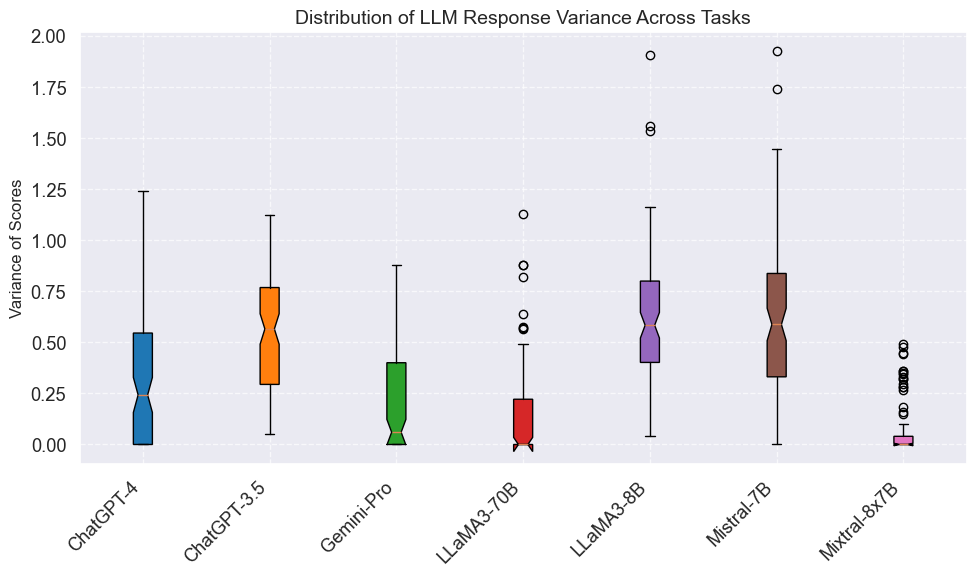

In [32]:
# Combine the data into a list
variances = [var_gpt4, vargpt3, var_gemini, var_llama70, var_llama8, var_mistral, var_mixtral]

# Model names corresponding to the variances
model_names = ['ChatGPT-4', 'ChatGPT-3.5', 'Gemini-Pro', 'LLaMA3-70B', 'LLaMA3-8B', 'Mistral-7B', 'Mixtral-8x7B']

# Plotting
plt.figure(figsize=(10, 6))

for i, var in enumerate(variances):
    plt.boxplot(var, vert=True, notch=True, patch_artist=True,
                positions=[i+1],  # Position on the x-axis
                boxprops=dict(facecolor=plt.cm.tab10(i)))

plt.ylabel("Variance of Scores", fontsize=12)
plt.xticks(range(1, len(model_names) + 1), model_names, rotation=45, ha="right") 
plt.title("Distribution of LLM Response Variance Across Tasks", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

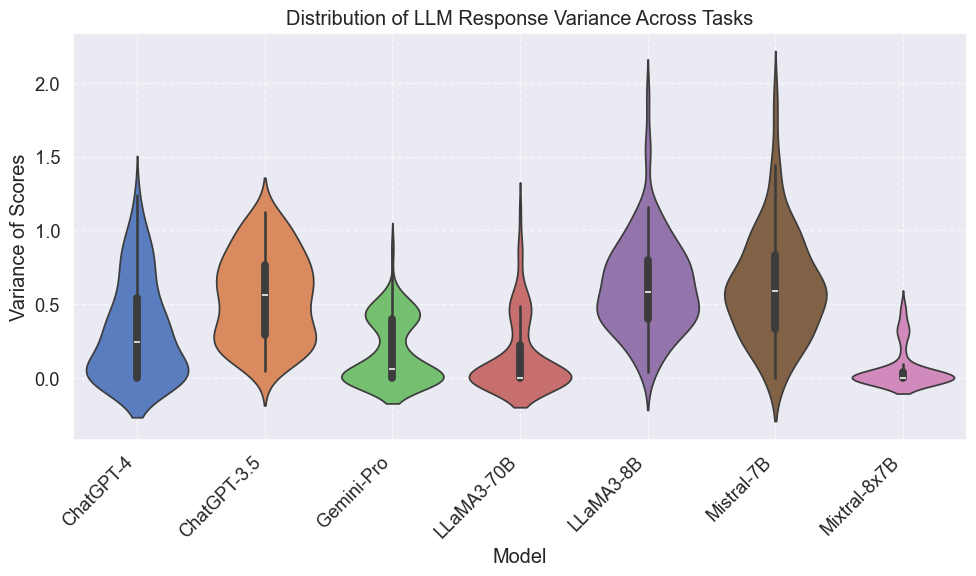

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=variances, palette="muted")  # Removed incorrect parameters
plt.xticks(range(len(model_names)), model_names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Variance of Scores")
plt.title("Distribution of LLM Response Variance Across Tasks")
plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.savefig('variance.png', dpi=300)
plt.show()


In [34]:
variances.shape

AttributeError: 'list' object has no attribute 'shape'